In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

Source: https://rawgit.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition/master/ipynb/html/Chapter%201%20-%20Mining%20Twitter.html

How to Generate API Key, Consumer Token, Access Key for Twitter OAuth

https://themepacific.com/how-to-generate-api-key-consumer-token-access-key-for-twitter-oauth/994/

# ------ Retreiving trends from Twitter -----

# Example 1. Authorizing an application to access Twitter account data

In [2]:
import twitter

# XXX: Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY="v026qAW3XhmpD5uiDFcs07nya"
CONSUMER_SECRET="F85kWFUZWr7aed2XE7i2Gfx533MYXSlXtAtbxMsD77G8asMYq6"
OAUTH_TOKEN="202360907-oPxbkCnyhtjmDHPyr9zlEHaWXAzZ4RZv9aytFqeu"
OAUTH_TOKEN_SECRET="yjLLBwwSTfFH64CgL5u485PqfyQP2Wz8NFOsi47ritfIi"

### The actual values are stored in keys.txt. Please do not use my keys. Please create your own.

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

# Example 2. Retrieving trends

In [3]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://developer.twitter.com/en/docs/trends/trends-for-location/api-reference/get-trends-place.html and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977
INDIA_WOE_ID= 23424848
# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)
india_trends = twitter_api.trends.place(_id=INDIA_WOE_ID)
print(world_trends)
print()
print(us_trends)
print()
print(india_trends)

[{'trends': [{'name': '#UAAPCDC2018', 'url': 'http://twitter.com/search?q=%23UAAPCDC2018', 'promoted_content': None, 'query': '%23UAAPCDC2018', 'tweet_volume': 204057}, {'name': '#GiletsJaunes', 'url': 'http://twitter.com/search?q=%23GiletsJaunes', 'promoted_content': None, 'query': '%23GiletsJaunes', 'tweet_volume': 136107}, {'name': '#كبده_ولا_فلافل', 'url': 'http://twitter.com/search?q=%23%D9%83%D8%A8%D8%AF%D9%87_%D9%88%D9%84%D8%A7_%D9%81%D9%84%D8%A7%D9%81%D9%84', 'promoted_content': None, 'query': '%23%D9%83%D8%A8%D8%AF%D9%87_%D9%88%D9%84%D8%A7_%D9%81%D9%84%D8%A7%D9%81%D9%84', 'tweet_volume': 11493}, {'name': '#اكثر_لعبه_ادمنتها', 'url': 'http://twitter.com/search?q=%23%D8%A7%D9%83%D8%AB%D8%B1_%D9%84%D8%B9%D8%A8%D9%87_%D8%A7%D8%AF%D9%85%D9%86%D8%AA%D9%87%D8%A7', 'promoted_content': None, 'query': '%23%D8%A7%D9%83%D8%AB%D8%B1_%D9%84%D8%B9%D8%A8%D9%87_%D8%A7%D8%AF%D9%85%D9%86%D8%AA%D9%87%D8%A7', 'tweet_volume': 18772}, {'name': '#VamosNationalU', 'url': 'http://twitter.com/search?q=%

# Example 3. Displaying API responses as pretty-printed JSON

In [4]:
import json
print(json.dumps(world_trends, indent=1))
print()
print(json.dumps(us_trends, indent=1))
print()
print(json.dumps(india_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "#UAAPCDC2018",
    "url": "http://twitter.com/search?q=%23UAAPCDC2018",
    "promoted_content": null,
    "query": "%23UAAPCDC2018",
    "tweet_volume": 204057
   },
   {
    "name": "#GiletsJaunes",
    "url": "http://twitter.com/search?q=%23GiletsJaunes",
    "promoted_content": null,
    "query": "%23GiletsJaunes",
    "tweet_volume": 136107
   },
   {
    "name": "#\u0643\u0628\u062f\u0647_\u0648\u0644\u0627_\u0641\u0644\u0627\u0641\u0644",
    "url": "http://twitter.com/search?q=%23%D9%83%D8%A8%D8%AF%D9%87_%D9%88%D9%84%D8%A7_%D9%81%D9%84%D8%A7%D9%81%D9%84",
    "promoted_content": null,
    "query": "%23%D9%83%D8%A8%D8%AF%D9%87_%D9%88%D9%84%D8%A7_%D9%81%D9%84%D8%A7%D9%81%D9%84",
    "tweet_volume": 11493
   },
   {
    "name": "#\u0627\u0643\u062b\u0631_\u0644\u0639\u0628\u0647_\u0627\u062f\u0645\u0646\u062a\u0647\u0627",
    "url": "http://twitter.com/search?q=%23%D8%A7%D9%83%D8%AB%D8%B1_%D9%84%D8%B9%D8%A8%D9%87_%D8%A7%D8%AF%D9%85%D9%86%D8%AA%

# Example 4. Computing the intersection of two sets of trends

In [5]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

india_trends_set = set([trend['name'] 
                     for trend in india_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)
print(common_trends)
common_trends = world_trends_set.intersection(india_trends_set)
print(common_trends)

{'#MinimizeAFilm', 'David Arquette', '#SaturdayMorning', 'ARA San Juan', '#UAAPCDC2018'}
{'#SurgujaWithRahul', '#AlyquePadamsee', '#GolfGlamourGlory', 'Manvendra Singh', '#LalaLajpatRai', '#CleanseOurCourts', '#GrandHomeXChangeOffer'}


# ----- Collecting search results and extracting text, screen names and hashtags from tweets -----

# Example 5. Collecting search results

In [8]:
q = '#FridayFeeling' 

count = 100

# See https://developer.twitter.com/en/docs/tweets/search/overview/standard.html

search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 210
{
 "created_at": "Sat Nov 17 10:47:30 +0000 2018",
 "id": 1063745438019448832,
 "id_str": "1063745438019448832",
 "text": "RT @Genesis33K: You know you're a Democrat when it's 2 weeks after the midterm elections and you're still voting! \n\n#FridayFeeling",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "FridayFeeling",
    "indices": [
     116,
     130
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "Genesis33K",
    "name": "\ud83c\uddfa\ud83c\uddf8GENESIS\ud83c\uddfa\ud83c\uddf8\ud83c\udf1f\ud83c\udf1f\ud83c\udf1f",
    "id": 700661366064095232,
    "id_str": "700661366064095232",
    "indices": [
     3,
     14
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
 "in_reply_to_status_id": null,
 "in_reply_to

# Example 6. Extracting text, screen names, and hashtags from tweets

In [20]:
status_texts = [ status['text'] 
                 for status in statuses ]

friends_count=[status['user']['friends_count'] for status in statuses]
followers_count=[status['user']['followers_count'] for status in statuses]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))
print(json.dumps(friends_count[0:5], indent=1))
print(json.dumps(followers_count[0:5], indent=1))


[
 "RT @Genesis33K: You know you're a Democrat when it's 2 weeks after the midterm elections and you're still voting! \n\n#FridayFeeling",
 "RT @ArchKennedy: Muslim Rep. #IlhanOmar admits she supports #BDS, after saying it was \"not helpful\" before election. Does anyone else find\u2026",
 "RT @TomHall: A man becomes disorientated\n\nin the middle of a busy street.\n\nA car stops, and a Hero emerges.\n\n\ud83c\udf0e \n\n#RandomActOfKindness #Frid\u2026",
 "RT @utahathletics: In the words of @UtahCoachWhitt, give it everything you've got.\n#goutes #FridayFeeling https://t.co/n9J3PkjdBs",
 "RT @comparethetreat: Who's got that #Fridayfeeling? Follow @_gofullcircle  &amp; retweet to win a hygiene pack of all that you need to keep you\u2026"
]
[
 "Genesis33K",
 "ArchKennedy",
 "TomHall",
 "utahathletics",
 "UtahCoachWhitt"
]
[
 "FridayFeeling",
 "IlhanOmar",
 "BDS",
 "RandomActOfKindness",
 "goutes"
]
[
 "RT",
 "@Genesis33K:",
 "You",
 "know",
 "you're"
]
[
 2224,
 418,
 921,
 323,
 4900
]


# ----- Lexical analysis of tweets -----

# Example 7. Creating a basic frequency distribution from the words in tweets

In [16]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT', 200), ('a', 123), ('#FridayFeeling', 86), ('and', 74), ('the', 69), ('A', 64), ('of', 61), ('in', 52), ('to', 47), ('on', 35)]

[('TomHall', 34), ('AshleyW838', 7), ('awaken_to_maga', 7), ('Twitter', 7), ('Genesis33K', 5), ('KailashOnline', 5), ('RSPBSherwood', 5), ('KBeatmaker', 4), ('pollsofpolitics', 4), ('realDonaldTrump', 4)]

[('FridayFeeling', 86), ('RandomActOfKindness', 29), ('TENDER', 10), ('Professional', 7), ('फेंकू', 5), ('Win', 4), ('producer', 4), ('dj', 4), ('musician', 4), ('StopBrexit', 4)]



# Example 8. Using prettytable to display tuples in a nice tabular format

In [17]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    _=[ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+----------------+-------+
| Word           | Count |
+----------------+-------+
| RT             |   200 |
| a              |   123 |
| #FridayFeeling |    86 |
| and            |    74 |
| the            |    69 |
| A              |    64 |
| of             |    61 |
| in             |    52 |
| to             |    47 |
| on             |    35 |
+----------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| TomHall         |    34 |
| AshleyW838      |     7 |
| awaken_to_maga  |     7 |
| Twitter         |     7 |
| Genesis33K      |     5 |
| KailashOnline   |     5 |
| RSPBSherwood    |     5 |
| KBeatmaker      |     4 |
| pollsofpolitics |     4 |
| realDonaldTrump |     4 |
+-----------------+-------+
+---------------------+-------+
| Hashtag             | Count |
+---------------------+-------+
| FridayFeeling       |    86 |
| RandomActOfKindness |    29 |
| TENDER              |    10 |
| Professional        |     7 |
| फेंक

# Example 9. Calculating lexical diversity for tweets

In [23]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.36239782016348776
0.5693430656934306
0.39
19.223809523809525


# Example 10. Plotting frequencies of words

Text(0.5, 0, 'Word Rank')

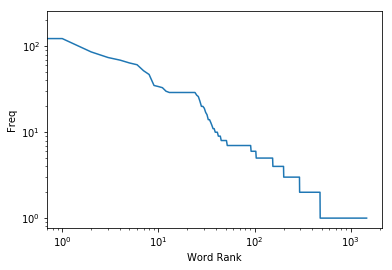

In [24]:
word_counts = sorted(Counter(words).values(), reverse=True)
import matplotlib.pyplot as plt
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

# Example 11. Generating histograms of words, screen names, and hashtags

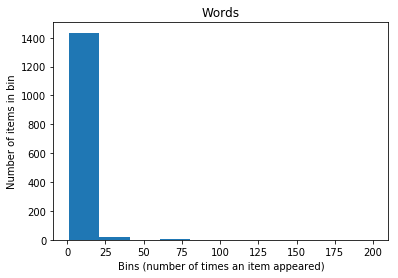

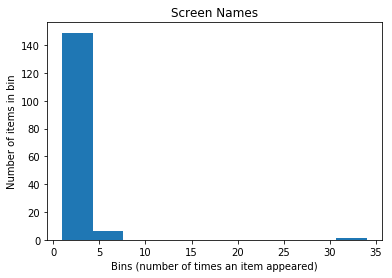

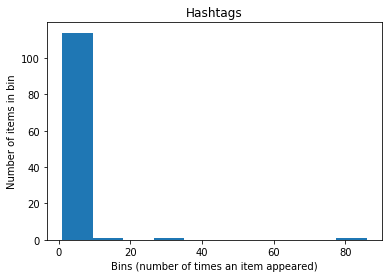

<Figure size 432x288 with 0 Axes>

In [25]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

# ----- Analysis of retweets -----

# Example 12. Finding the most popular retweets

In [31]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
_=[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:50] ]
pt.max_width['Text'] = 100
pt.align= 'l'
print(pt)

+-------+-----------------+------------------------------------------------------------------------------------------------------+
| Count | Screen Name     | Text                                                                                                 |
+-------+-----------------+------------------------------------------------------------------------------------------------------+
| 9224  | TomHall         | RT @TomHall: A man becomes disorientated                                                             |
|       |                 |                                                                                                      |
|       |                 | in the middle of a busy street.                                                                      |
|       |                 |                                                                                                      |
|       |                 | A car stops, and a Hero emerges.                       

# Example 13. Looking up users who have retweeted a status

In [32]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here in place of the sample value that is provided
# from the text of the book

_retweets = twitter_api.statuses.retweets(id=317127304981667841)
print([r['user']['screen_name'] for r in _retweets])

['jyeee', 'Ceejaynatics', 'shekinahp_', 'LoveKyana18', 'kidamgos', 'asdfghjbl', 'josellexseraspi', 'anneyyeong']


# Example 14. Generating a histogram of retweet counts

[72, 953, 9224, 16, 152, 231, 345, 1520, 2, 72, 116, 54, 474, 434, 2, 228, 31, 15, 2, 983, 429, 264, 175, 347, 1, 891, 407, 2016, 921, 581, 9224, 351, 819, 2, 107, 226, 2, 9224, 2644, 290, 72, 921, 183, 33, 228, 9224, 2, 2, 3, 2, 23, 2, 345, 9224, 891, 1257, 1113, 228, 272, 2043, 891, 1520, 1, 9224, 3411, 243, 30, 429, 228, 429, 10, 10, 9224, 82, 9224, 72, 63, 921, 10, 120, 65, 9224, 82, 347, 1834, 921, 2043, 5, 9224, 10, 9224, 762, 26, 9224, 10, 227, 8, 2016, 9224, 272, 854, 10, 330, 4, 228, 120, 365, 592, 9224, 9224, 429, 9, 162, 1834, 921, 921, 9224, 9224, 1520, 1113, 23, 2016, 226, 10, 61, 11, 310, 162, 9224, 28, 15, 226, 9224, 9224, 70, 81, 2043, 9224, 2, 1178, 15, 2043, 5, 1257, 48, 16, 757, 762, 755, 86, 1113, 9224, 1, 757, 5, 2, 9224, 757, 459, 2016, 291, 9224, 5, 79, 1, 35, 853, 65, 228, 229, 228, 9224, 156, 4021, 44, 9224, 114, 61, 9224, 2016, 227, 9224, 921, 347, 85, 2, 72, 755, 42, 20, 9224, 891, 24, 336]


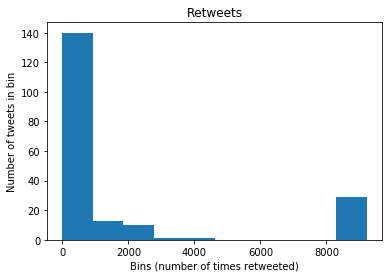

In [33]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print(counts)

Text(0, 0.5, 'Log[Number of tweets in bin]')

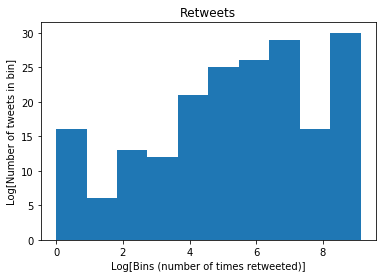

In [29]:
#Here's another variation that transforms the data using the 
#log function in order to improve the resolution of the plot.

counts = [count for count, _, _ in retweets  if count!=0]

# Taking the log of the *data values* themselves can 
# often provide quick and valuable insight into the
# underlying distribution as well. Try it back on
# Example 13 and see if it helps.
import numpy
plt.hist(numpy.log(counts))
plt.title("Retweets")
plt.xlabel('Log[Bins (number of times retweeted)]')
plt.ylabel('Log[Number of tweets in bin]')

#print log(counts)